In [1]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import numpy as np

In [2]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [4]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [5]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [6]:
def bias(y, z):
    return (y - z)

In [134]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [96]:
# Число деревьев в ансамбле
n_trees = 20

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 0.1

In [46]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    
    train_prediction = gb_predict(X_train, trees, coefs, eta)
    train_err = mean_squared_error(y_train, train_prediction);
    
    #print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    #с шагом {eta} на тренировочной выборке: {}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)
    tesr_err = mean_squared_error(y_test, test_prediction)
    
    #print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    #с шагом {eta} на тестовой выборке: {}')
    
    return train_err, test_err

In [73]:
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [74]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

(2496.4630400692827, 3523.4939885182653)

# Задание 1

In [100]:
min_trees, max_trees, step = 5, 101, 10
train_error, test_error = [], []
for n_trees in range(min_trees, max_trees, step):
    trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    train_err, test_err = evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
    train_error.append(train_err)
    test_error.append(test_err)
    if n_trees % 5 == 0:
        print(n_trees)

5
15
25
35
45
55
65
75
85
95


In [82]:
import matplotlib.pyplot as plt
def plot_errors_of_trees(n_trees, train_err, test_err):
    plt.xlabel('n_trees')
    plt.ylabel('MSE')
    plt.xlim(0, max(n_trees))
    plt.plot(list(n_trees), train_err, label='train error')
    plt.plot(list(n_trees), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

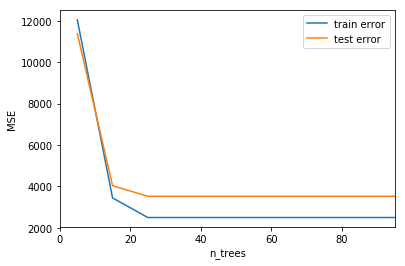

In [101]:
plot_errors_of_trees(range(min_trees, max_trees, step), train_error, test_error)

### С ростом количества деревьев, ошибки на обучающей и тестовой выборках сначала монотонно уменьшается, а затем стабилизируется. Переобучение при данном значении eta не наблюдается, возможно оно наступает при большем количестве деревьев (при eta = 1, переобучение наступает при количестве деревьев < 10)

In [103]:
n_trees = 20
min_m_deth, max_m_deth, step = 2, 15, 2
train_error, test_error = [], []
for m_deth in range(min_m_deth, max_m_deth, step):
    trees, train_errors, test_errors = gb_fit(n_trees, m_deth, X_train, X_test, y_train, y_test, coefs, eta)
    train_err, test_err = evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
    train_error.append(train_err)
    test_error.append(test_err)

In [104]:
import matplotlib.pyplot as plt
def plot_errors_of_deth(m_deth, train_err, test_err):
    plt.xlabel('tree max deth')
    plt.ylabel('MSE')
    plt.xlim(0, max(m_deth))
    plt.plot(list(m_deth), train_err, label='train error')
    plt.plot(list(m_deth), test_err, label='test error')
    plt.legend(loc='upper left')
    plt.show()

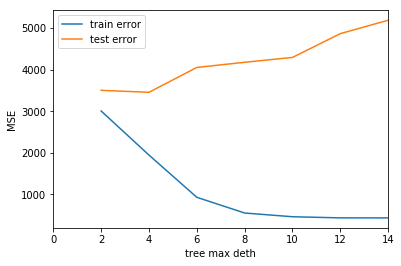

In [106]:
plot_errors_of_deth(range(min_m_deth, max_m_deth, step), train_error, test_error)

### В данном случае видим, что при монотонном снижении ошибки на обучающей выборке, ошибка на тестовой выборке начинает расти при max_deth>4, то есть наступает переобучение

# Задание 2

In [130]:
import random
random.seed(42)

def get_subset(x, y):
    indexes = np.random.choice(x.shape[0], x.shape[0] // 2, replace=False)
    return x[indexes], y[indexes]

In [133]:
def gb_fit_st(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    X_train, y_train = get_subset(X_train, y_train)
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [149]:
n_trees = 50
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
trees, train_errors_st, test_errors_st = gb_fit_st(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [151]:
def plot_errors_test(n_trees, train_err, train_err_st):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), train_err_st, label='train error st')
    plt.legend(loc='upper right')
    plt.show()

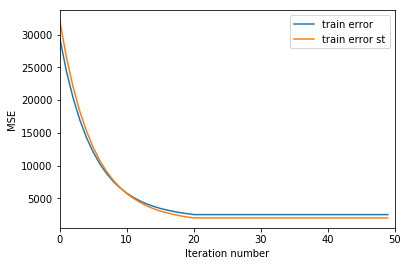

In [152]:
plot_errors_test(n_trees, train_errors, train_errors_st)